In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

#input CSV files into dataframes, set column headers (same for all)
rand_forest = pd.read_csv("RF_filtering_result.csv",usecols = [0,3,6],header = None)
greedy = pd.read_csv("greedy_result.csv",usecols = [0,3,6],header = None)
enrichment = pd.read_csv("enrichment_MS_summary.csv",usecols = [0,3,6],header = None)
z_test = pd.read_csv("p_value_result.csv",usecols = [0,3,6],header = None)
tabu_pnpsc = pd.read_csv("Tabu_PNPSC_result.csv",usecols = [0,3,6],header = None)
rilp = pd.read_csv("RILP_result.csv",usecols = [0,3,6],header = None)
random = pd.read_csv("random_motifs.csv",usecols = [0,3,6],header = None)
cols = ["Accuracy","Num_Motifs"]
greedy.columns = random.columns = enrichment.columns = z_test.columns = tabu_pnpsc.columns = rilp.columns = rand_forest.columns = ["Groups","Accuracy","Num_Motifs"]

#use melt to reshape the dataframe and attach id-variables
#displays sensitivity, specificity, etc across each group
rand_forest2 = pd.melt(rand_forest,value_vars=cols,id_vars="Groups")
greedy2 = pd.melt(greedy,value_vars=cols,id_vars="Groups")
enrichment2 = pd.melt(enrichment,value_vars=cols,id_vars="Groups")
z_test2 = pd.melt(z_test,value_vars=cols,id_vars="Groups")
tabu_pnpsc2 = pd.melt(tabu_pnpsc,value_vars=cols,id_vars="Groups")
rilp2 = pd.melt(rilp,value_vars=cols,id_vars="Groups")
random2 = pd.melt(random,value_vars=cols,id_vars="Groups")

#label each method so it will be clear which algorithm the data came from
rand_forest2["method"] = "Random_Forest"
greedy2["method"] = "Greedy"
enrichment2["method"] = "Enrichment"
z_test2["method"] = "Z-test"
tabu_pnpsc2["method"] = "Tabu_PNPSC"
rilp2["method"] = "RILP"
random2["method"] = "Random"

#now sort the methods we want to sort by:
#enrichment, random
rowsper = enrichment2.shape[0] / 2
enrichmentSORT = enrichment2.sort_values("value",ascending=False).groupby("variable").head(rowsper)
rowsper = random2.shape[0] / 2
randomSORT = random2.sort_values("value",ascending=False).groupby("variable").head(rowsper)

randomSORT


,Groups,variable,value,method
100,BRCA1,Num_Motifs,10.000000,Random
104,ZBTB33,Num_Motifs,10.000000,Random
65,POU2F2,Num_Motifs,10.000000,Random
64,ATF3,Num_Motifs,10.000000,Random
101,EP300,Num_Motifs,10.000000,Random
57,MYC,Num_Motifs,10.000000,Random
61,ETS,Num_Motifs,9.000000,Random
66,RXRA,Num_Motifs,9.000000,Random
74,SRF,Num_Motifs,9.000000,Random
62,NR3C1,Num_Motifs,9.000000,Random


In [2]:
#create dirs for the two different types of line graphs: evaluation on 3 algorithms vs. on all
#just to keep from being cluttered
if not os.path.exists("3algs"):
	os.makedirs("3algs")
merged = [randomSORT,enrichment2,rand_forest2]
result3RVAL = pd.concat(merged)
path = "/home/osboxes/visualization/3algs/result3RVAL.csv"
merged = [enrichmentSORT,random2,rand_forest2]
result3EVAL = pd.concat(merged)
result3EVAL.to_csv(path)
if not os.path.exists("allalgs"):
	os.makedirs("allalgs")
merged = [randomSORT,rand_forest2,greedy2,enrichment2,z_test2,tabu_pnpsc2,rilp2]
resultRVAL = pd.concat(merged)
path = "/home/osboxes/visualization/allalgs/resultRVAL.csv"
resultRVAL.to_csv(path)

result3EVAL

,Groups,variable,value,method
81,TATA,Num_Motifs,10.0,Enrichment
101,EP300,Num_Motifs,10.0,Enrichment
72,AP1,Num_Motifs,10.0,Enrichment
89,REST,Num_Motifs,10.0,Enrichment
95,CTCF,Num_Motifs,10.0,Enrichment
57,MYC,Num_Motifs,10.0,Enrichment
61,ETS,Num_Motifs,9.0,Enrichment
55,E2F,Num_Motifs,8.0,Enrichment
63,STAT,Num_Motifs,7.0,Enrichment
67,EGR1,Num_Motifs,7.0,Enrichment


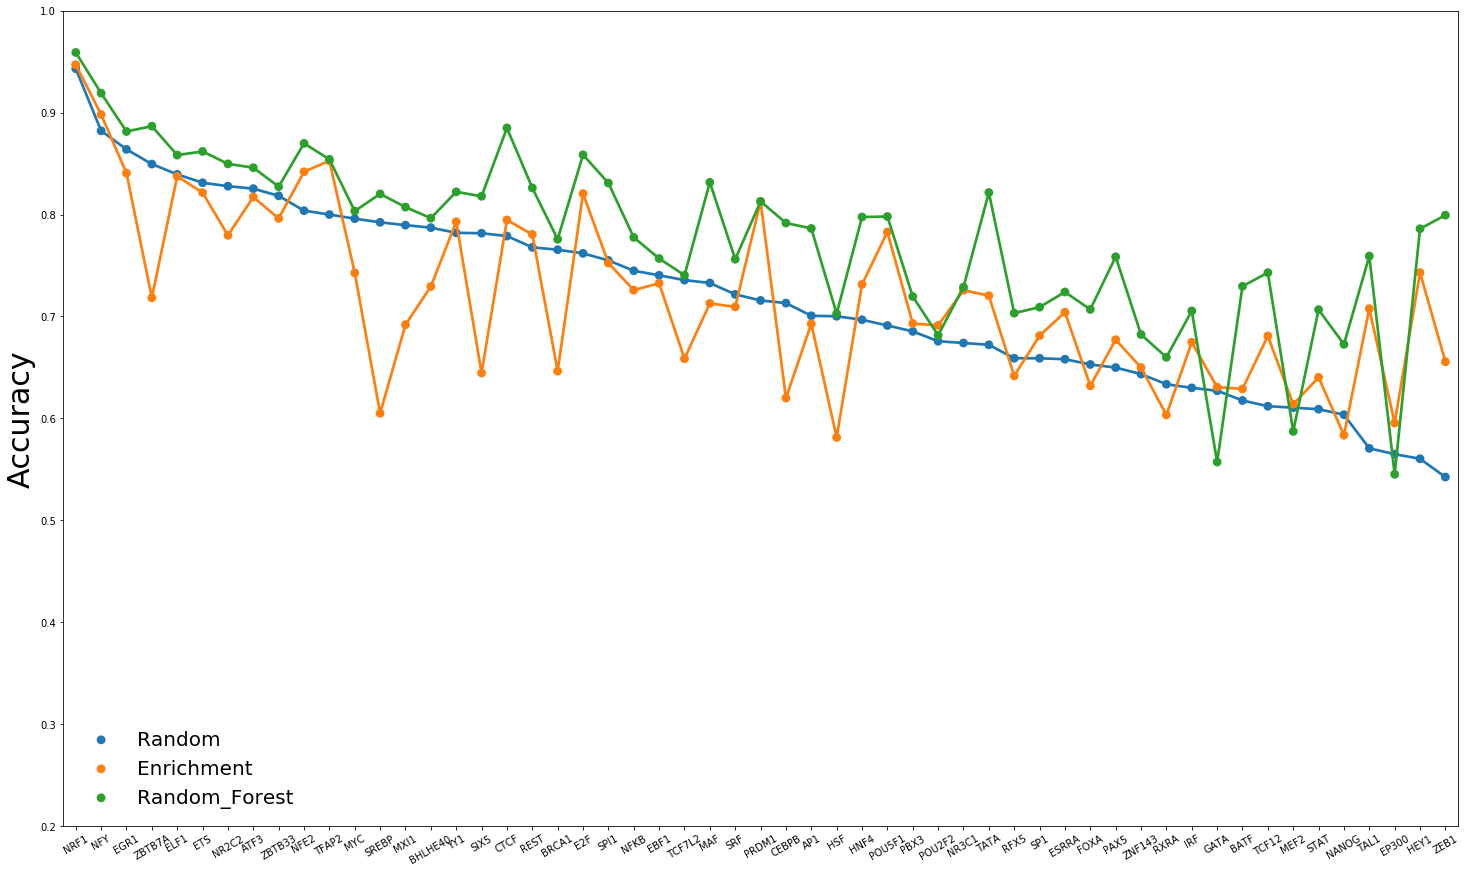

In [3]:
#FIRST TWO: sort by random on 3, num motifs and accuracy
#plot Accuracy ALPHABETICAL
f, ax = plt.subplots(figsize=(25,15))
g = sns.pointplot(x="Groups",jitter=0.3,alpha=0.7,size=15,y="value",hue="method",data=result3RVAL[result3RVAL['variable']=="Accuracy"])
g.set_xticklabels(g.get_xticklabels(),rotation=30)
handles, labels = ax.get_legend_handles_labels()
ax.tick_params(labelsize=10)
ax.set_xlabel('')
ax.set_ylabel('Accuracy',fontsize=30)
ax.set_ylim([0.2, 1])
legend = plt.legend(loc=3, prop={'size': 20},frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
path = "/home/osboxes/visualization/3algs/AccuracyOnThree_RVAL.png"
plt.savefig(path,dpi=300)

f

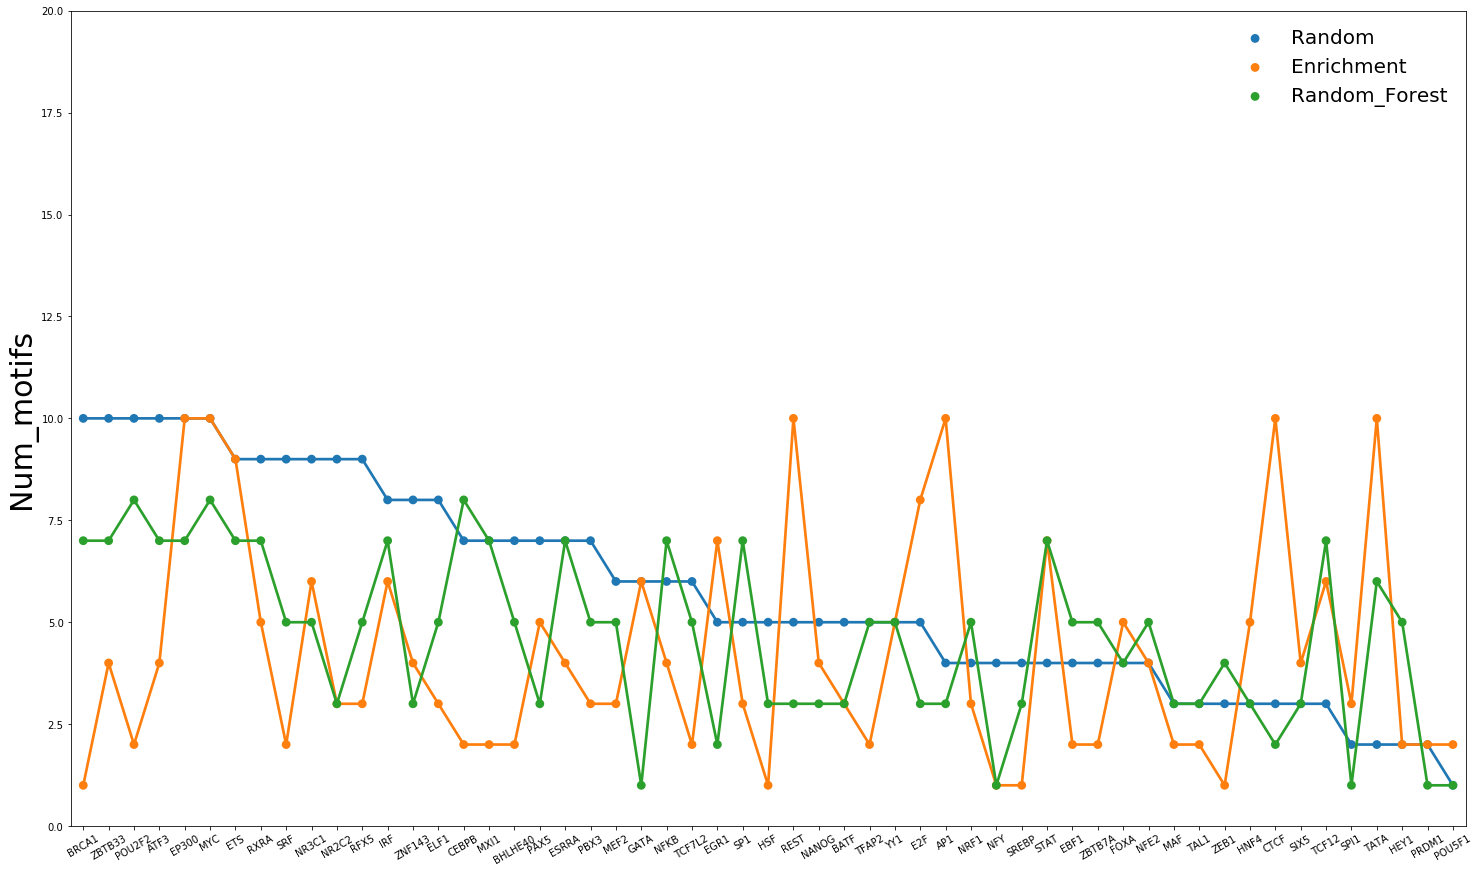

In [4]:
#FIRST TWO: sort by random on 3, num motifs and accuracy
#plot num motifs, sort by random algo
f, ax = plt.subplots(figsize=(25,15))
g = sns.pointplot(x="Groups",jitter=0.3,alpha=0.7,size=15,y="value",hue="method",data=result3RVAL[result3RVAL['variable']=="Num_Motifs"])
g.set_xticklabels(g.get_xticklabels(),rotation=30)
handles, labels = ax.get_legend_handles_labels()
ax.tick_params(labelsize=10)
ax.set_xlabel('')
ax.set_ylabel('Num_motifs',fontsize=30)
ax.set_ylim([0, 20])
legend = plt.legend(loc=0, prop={'size': 20},frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
path = "/home/osboxes/visualization/3algs/NumMotifsOnThree_RVAL.png"
plt.savefig(path,dpi=300)

f

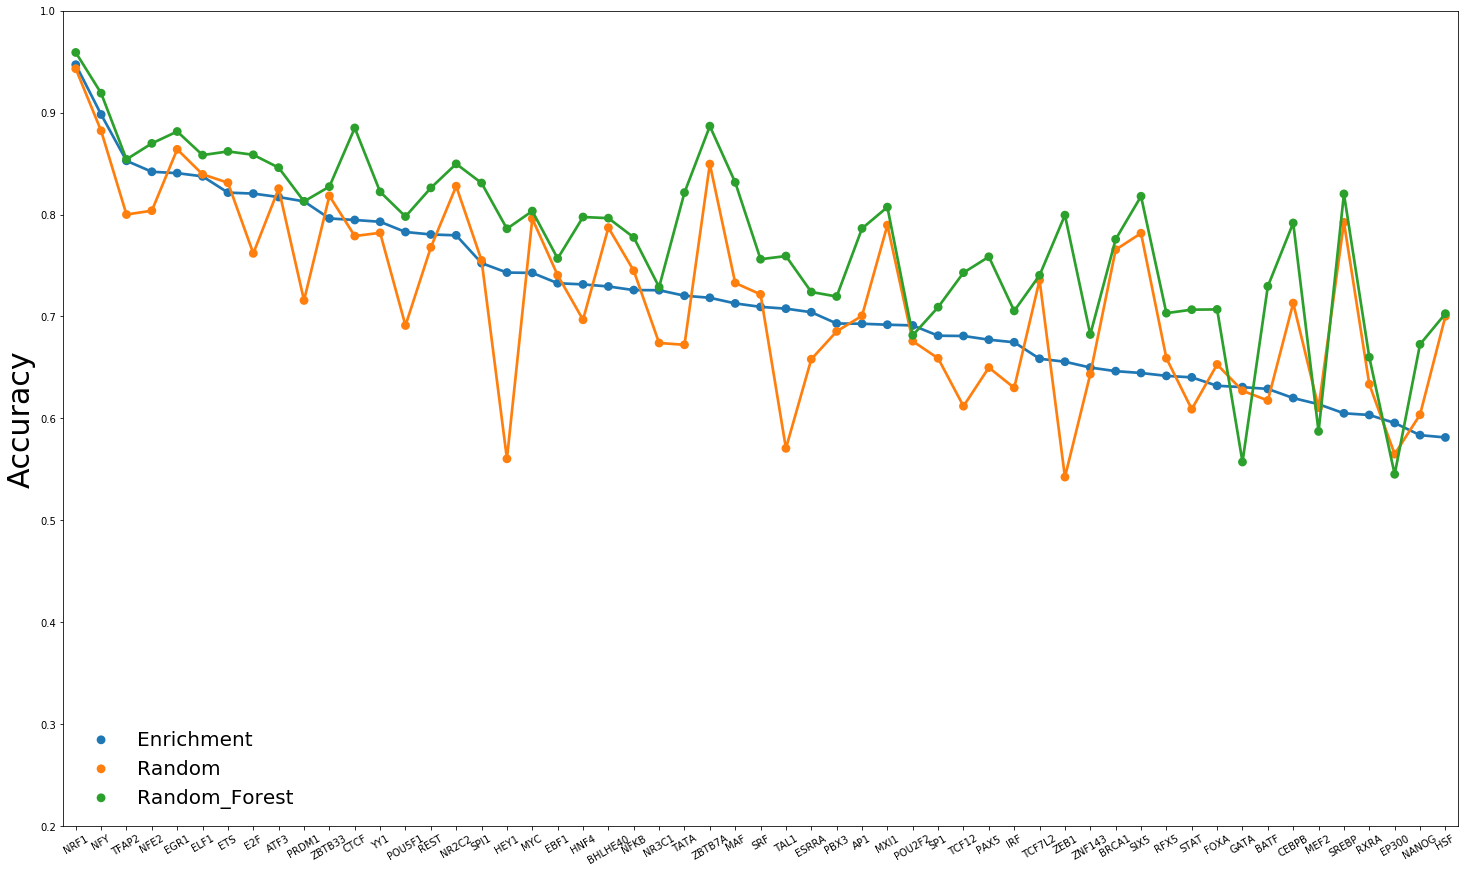

In [5]:
#FIRST TWO: sort by random on 3, num motifs and accuracy
#plot Accuracy ALPHABETICAL
f, ax = plt.subplots(figsize=(25,15))
g = sns.pointplot(x="Groups",jitter=0.3,alpha=0.7,size=15,y="value",hue="method",data=result3EVAL[result3EVAL['variable']=="Accuracy"])
g.set_xticklabels(g.get_xticklabels(),rotation=30)
handles, labels = ax.get_legend_handles_labels()
ax.tick_params(labelsize=10)
ax.set_xlabel('')
ax.set_ylabel('Accuracy',fontsize=30)
ax.set_ylim([0.2, 1])
legend = plt.legend(loc=3, prop={'size': 20},frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
path = "/home/osboxes/visualization/3algs/AccuracyOnThree_EVAL.png"
plt.savefig(path,dpi=300)

f

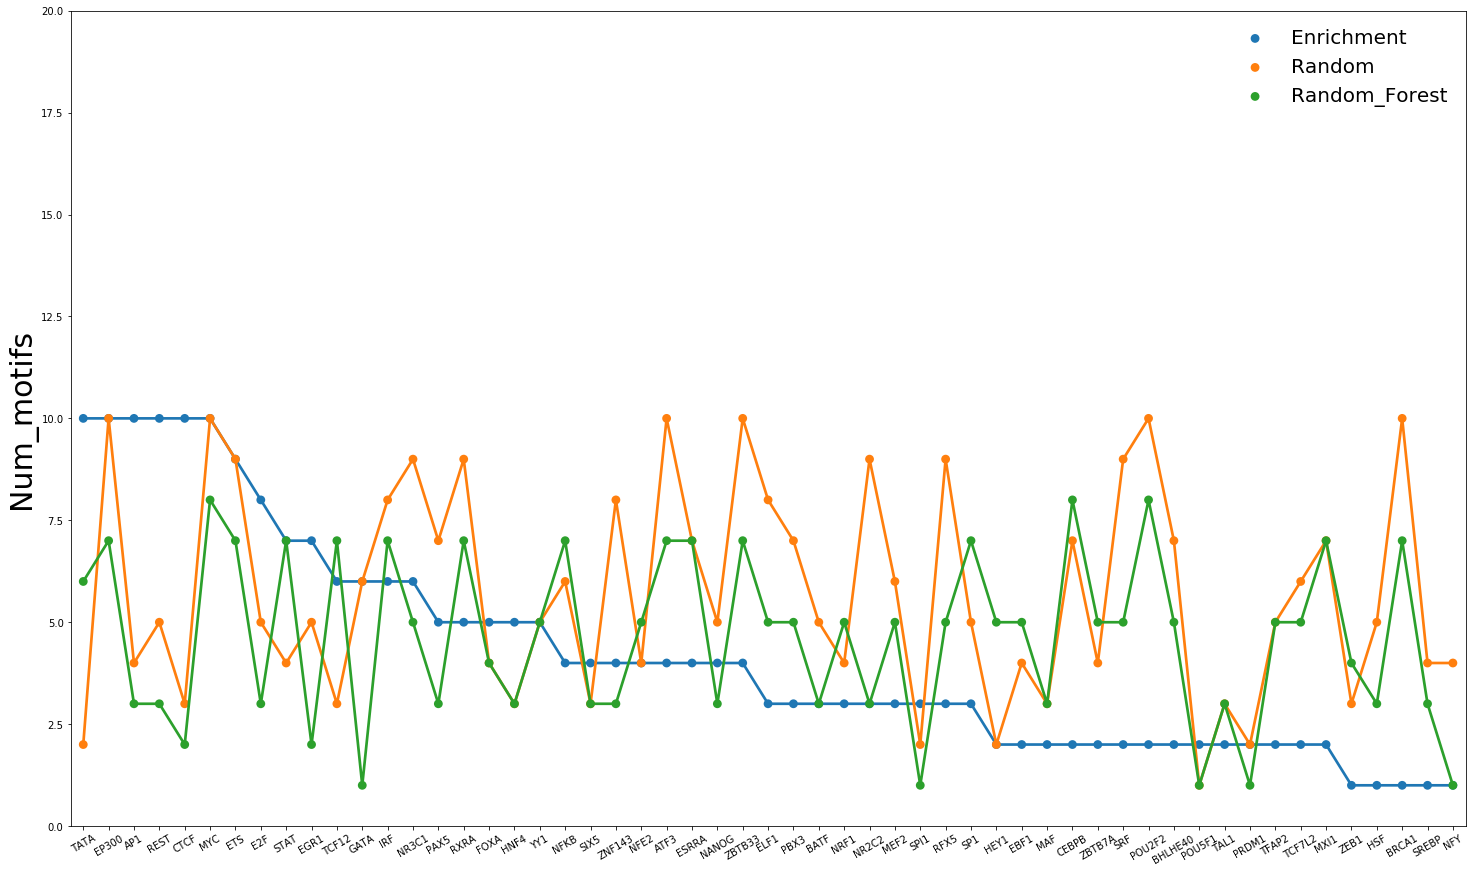

In [6]:
#FIRST TWO: sort by random on 3, num motifs and accuracy
#plot num motifs, sort by random algo
f, ax = plt.subplots(figsize=(25,15))
g = sns.pointplot(x="Groups",jitter=0.3,alpha=0.7,size=15,y="value",hue="method",data=result3EVAL[result3EVAL['variable']=="Num_Motifs"])
g.set_xticklabels(g.get_xticklabels(),rotation=30)
handles, labels = ax.get_legend_handles_labels()
ax.tick_params(labelsize=10)
ax.set_xlabel('')
ax.set_ylabel('Num_motifs',fontsize=30)
ax.set_ylim([0, 20])
legend = plt.legend(loc=0, prop={'size': 20},frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
path = "/home/osboxes/visualization/3algs/NumMotifsOnThree_EVAL.png"
plt.savefig(path,dpi=300)

f

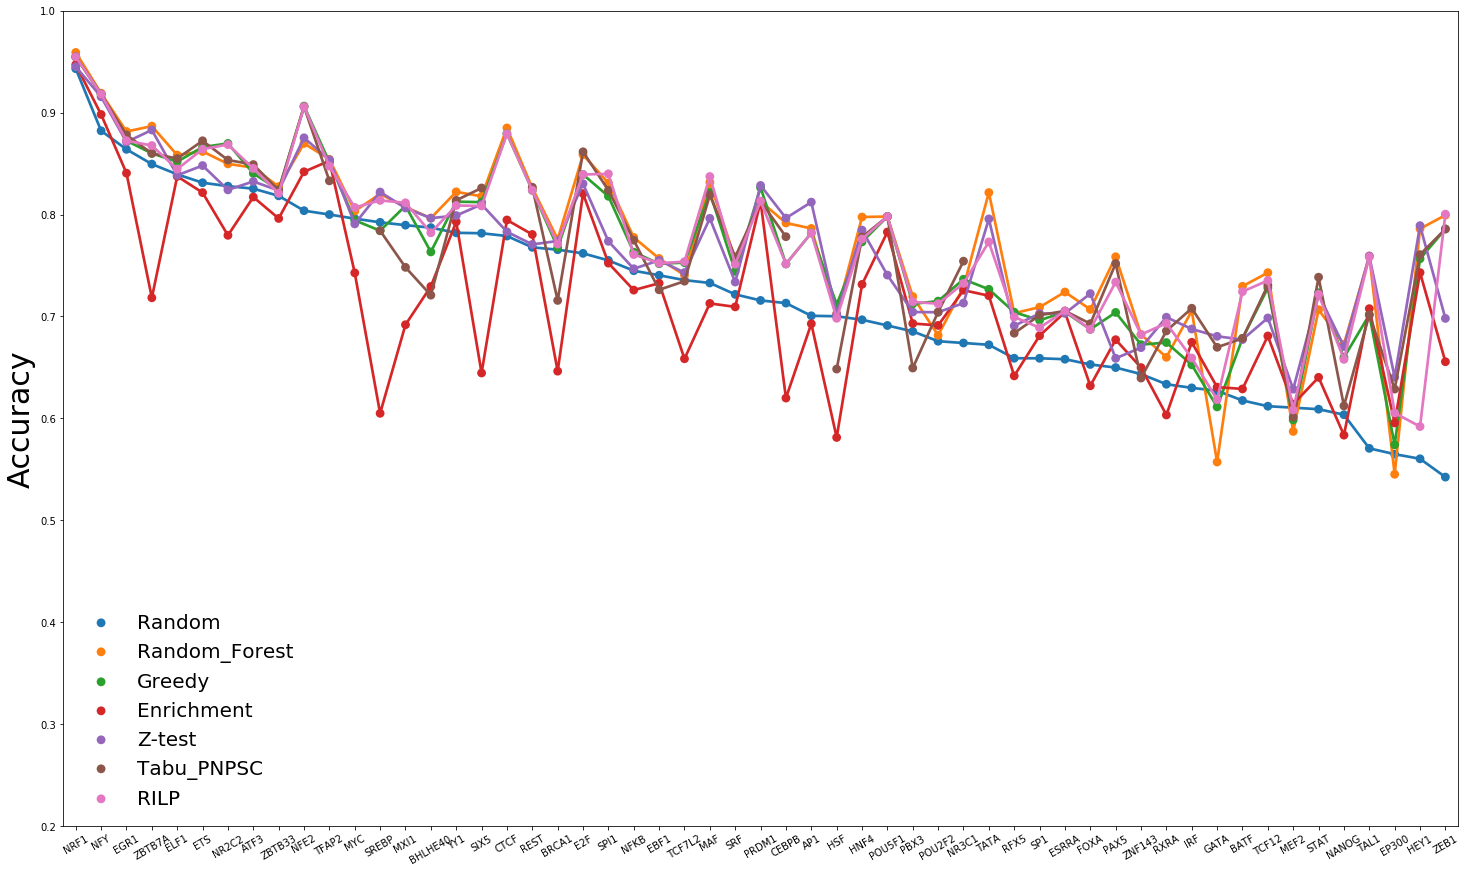

In [7]:
#FIRST TWO: sort by random on 3, num motifs and accuracy
#plot Accuracy ALPHABETICAL
f, ax = plt.subplots(figsize=(25,15))
g = sns.pointplot(x="Groups",jitter=0.3,alpha=0.7,size=15,y="value",hue="method",data=resultRVAL[resultRVAL['variable']=="Accuracy"])
g.set_xticklabels(g.get_xticklabels(),rotation=30)
handles, labels = ax.get_legend_handles_labels()
ax.tick_params(labelsize=10)
ax.set_xlabel('')
ax.set_ylabel('Accuracy',fontsize=30)
ax.set_ylim([0.2, 1])
legend = plt.legend(loc=3, prop={'size': 20},frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
path = "/home/osboxes/visualization/allalgs/AccuracyOnAll_RVAL.png"
plt.savefig(path,dpi=300)

f

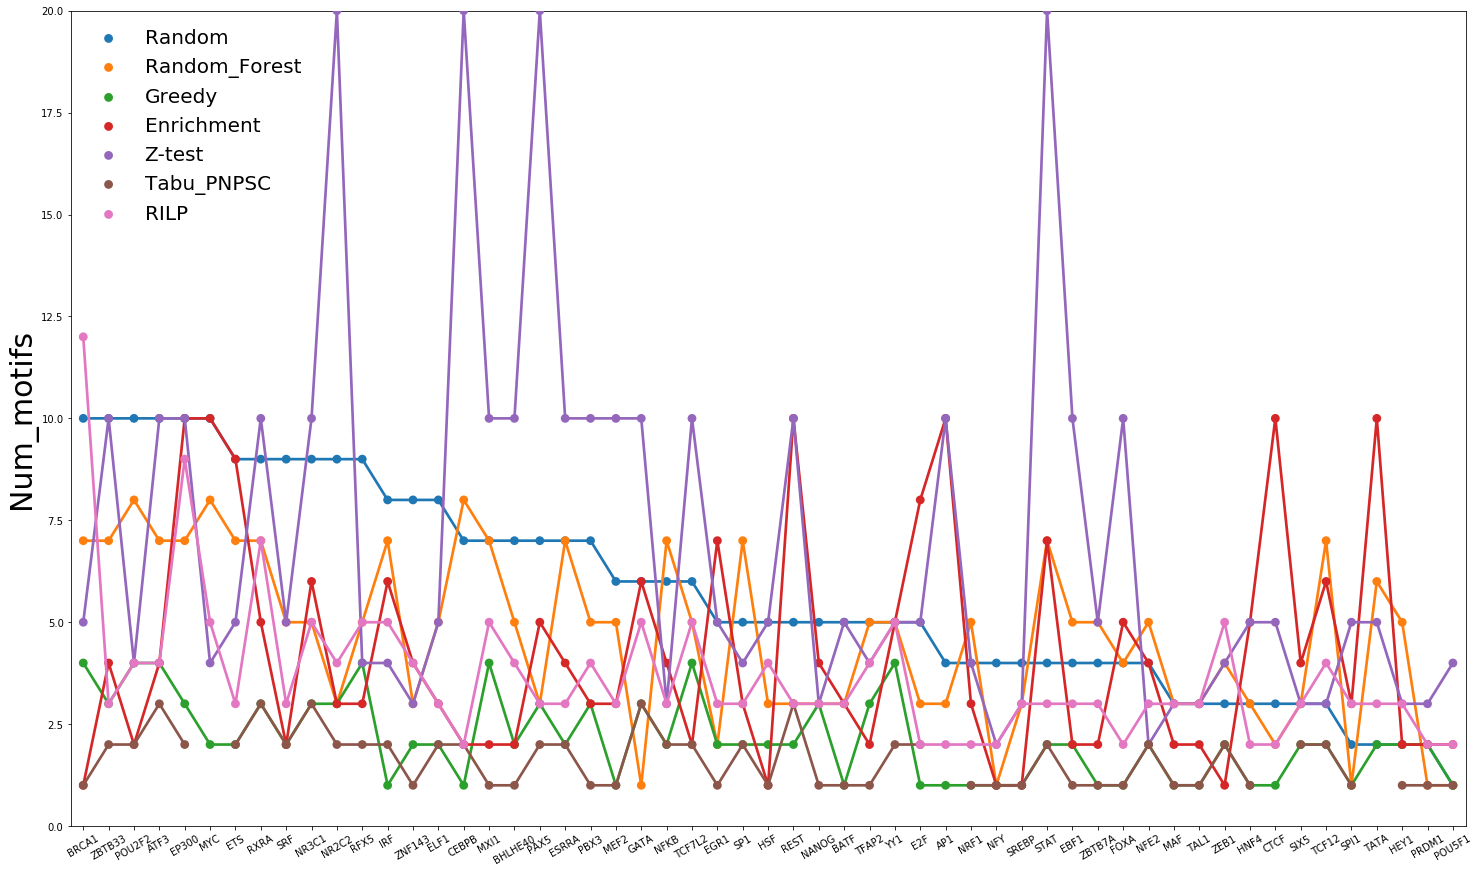

In [8]:
#FIRST TWO: sort by random on 3, num motifs and accuracy
#plot Accuracy ALPHABETICAL
f, ax = plt.subplots(figsize=(25,15))
g = sns.pointplot(x="Groups",jitter=0.3,alpha=0.7,size=15,y="value",hue="method",data=resultRVAL[resultRVAL['variable']=="Num_Motifs"])
g.set_xticklabels(g.get_xticklabels(),rotation=30)
handles, labels = ax.get_legend_handles_labels()
ax.tick_params(labelsize=10)
ax.set_xlabel('')
ax.set_ylabel('Num_motifs',fontsize=30)
ax.set_ylim([0, 20])
legend = plt.legend(loc=2, prop={'size': 20},frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('white')
path = "/home/osboxes/visualization/allalgs/NumMotifsOnAll_RVAL.png"
plt.savefig(path,dpi=300)

f